Simulazione del passaggio di fotoni attraverso un materiale.
-----------------------------------------------------------

Usiamo l'attenuazione esponenziale di un fascio di fotoni e la sezione d'urto di Thomson per descrivere lo scattering di un fotone su un elettrone.<BR>
Da
    $$ N(z) = N_0\,e^{-\frac{z}{\lambda}}$$
si ricava che il numero di fotoni per unità di lunghezza che interagiscono fra $z_0$ e $z_0 +\Delta$ è
     $$ \lim_{\Delta\rightarrow 0} \frac{N(z_0)-N(z_0+\Delta)}{\Delta} = -\frac{d\,N}{d\,z} {\bigg \vert}_{z_0}.$$
Di conseguenza, la densit&agrave; di probabilit&agrave; che un fotone interagisca nel punto di coordinata $x$
nel materiale &egrave;
    $$P(z) = \frac{1}{\lambda}\,e^{-\frac{z}{\lambda}}.$$
Un valore ragionevole per fotoni di 100 keV in un materiale di densit&agrave; 1.8 $g/cm^3$ (osso) è $\lambda = 2 \,cm$.<BR>
La densit&agrave; di probabilit&agrave; che un fotone che si propaga lungo l'asse $z$ sia deflesso in una direzione caratterizzata dagli angoli $\theta,\,\phi$ &egrave; data da $$Q(\cos\theta,\phi) = \frac{3}{16\,\pi}\,(1+\cos^2\theta).$$
    <P>
Se il materiale si estende per 10 $cm\,=\,5\,\lambda$, qual'&egrave; la probabilit&agrave; che un fotone fuoriesca dalla
        lastra con un angolo $\theta_f$? Quale frazioni dei fotoni iniziali passer&agrave; la lastra?

Si procede come segue:<BR>

1) Inizialmente il fotone si trova nel punto $X_0\,=\,(x,y,z)\,=\,(0,0,0)$ e si propaga in direzione $z$<BR>
2) generiamo una distanza $d_0$ usando la distribuzione $N(z)$<BR>
   
Assumiamo che, alla prima interazione, il fotone si trovi nel punto $X_1\,=\,(0,0,d_0)$.
    
3) generiamo dei valori $d1,\,\cos\theta_1,\,\phi_1$ secondo le distribuzion1 $N(z),\,Q(\cos\theta,\phi)$.
    Il fotone si sposta nel punto $X_2\,=\,X_1 + d1*(\sin\theta\,\cos\phi,\sin\theta\,\sin\phi, \cos\theta)$.<BR>
        

4) Ripetiamo la procedura partendo dai nuovi valori: generiamo $d_2,\cos\theta_2,\phi_2$; calcoliamo il punto 
    $X_2\,=\,(x_2,y_2,y_2)$ in cui il fotone avr&agrave; la terza interazione.
    
5) Se $y_2 > 10\,cm$ il fotone sar&agrave; uscito dalla lastra. Ne calcolo l'angolo  $\theta_f$ e lo salvo in un file.<BR> &nbsp;&nbsp;&nbsp;&nbsp; Se $y_2 < 10\,cm$ sottopongo il fotone ad una ulteriore interazione.
   


#### Una figura vale più di mille parole:

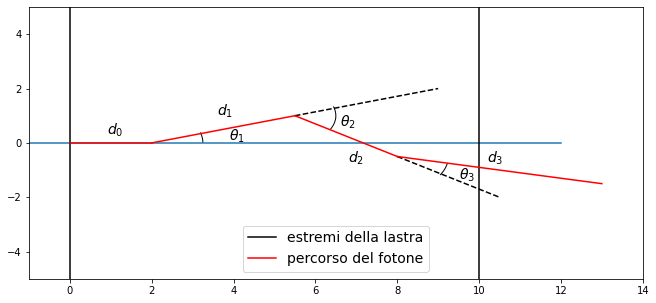

In [8]:
import matplotlib.pyplot as plt
from matplotlib import patches

fig, ax = plt.subplots(figsize=(11,5))
ax.set_xlim(-1,14)
ax.set_ylim(-5,5)
ax.plot([-1,12],[0,0])
ax.plot([0,0],[-5,5],c='0',label='estremi della lastra')
ax.plot([10,10],[-5,5],c='0')

ax.plot([0,2],[0,0],c='r',label='percorso del fotone')
arc1 = patches.Arc((2.,0),2.5,2.5,theta1=0.,theta2=18.,color='0')
ax.add_patch(arc1);

ax.plot([2.,5.5],[0,1],c='r')
ax.plot([5.5,9],[1,2],linestyle='--',c='0')
arc2 = patches.Arc((5.5,1),2,2,angle=20.,theta1=-50.,theta2=0.,color='0')
ax.add_patch(arc2)

ax.plot([5.5,8.],[1.,-0.5],c='r')
ax.plot([8.,10.5],[-0.5,-2.0],linestyle='--',color='0')

ax.plot([8.,13],[-0.5,-1.5],c='r')
arc3 = patches.Arc((8.,-0.5),2.5,2.5,angle=-33.,theta1=0.,theta2=22.,color='0')
ax.add_patch(arc3);

plt.text(0.9, .3, r'$d_0$', {'color': 'k', 'fontsize': 14})
plt.text(3.6, 1., r'$d_1$', {'color': 'k', 'fontsize': 14})
plt.text(6.8, -0.7, r'$d_2$', {'color': 'k', 'fontsize': 14})
plt.text(10.2, -0.7, r'$d_3$', {'color': 'k', 'fontsize': 14})

plt.text(3.9, 0.11, r'$\theta_1$', {'color': 'k', 'fontsize': 14})
plt.text(6.6, 0.6, r'$\theta_2$', {'color': 'k', 'fontsize': 14})
plt.text(9.5, -1.35, r'$\theta_3$', {'color': 'k', 'fontsize': 14})
ax.legend( fontsize= 14);

In [5]:
import numpy as np

def new_step(beta):
    '''
    Generates random distance and two angles:
    beta is the attenuation length. Over one attenuation length, the
    number of photons in the beam decreases by 1/e.
    It is the only parameter in P(d)=exp(-d/beta)/beta;
    The distribution in cos(theta) is f=3/8*(1+cos(theta)**2));
    The distribution for phi is uniform in (0,2*pi).
    '''
    d=np.array([0,0,np.random.exponential(beta)])
    ctheta=generate_f(f_Thomson,-1,1,0.75)
    phi=np.random.uniform(0,2*np.pi)
    return d,ctheta,phi


def generate_f(f,a,b,max):
    '''
    Generate random points distributed according to an input distribution
    Input:
    f: the probability distribution
    a,b: extrema of the range for the desired random number
    max: a real number such that f(x) < max for each x
    Returns:
    ranval: random number
    '''
    not_found=True
    while not_found:
        x=np.random.uniform(a,b)
        y=np.random.uniform(0,max)
        if f(x)>y:
            not_found=False
    
    return x
    
def f_Thomson(x):
    val=3./8.*(1+x**2)
    
    return val    

def Rx_M(c):
    """
    Rotation matrix of an angle defined by cos(theta) around the x-axis
    """
    # Trusting -1 =< c =< 1
    s = np.sqrt(1.-c**2)
    R = np.array(
        [[1, 0, 0], 
         [0, c, -s], 
         [0, s, c]]
    )
    return R

def Rz_M(phi):
    """
    Rotation matrix of an angle phi around the z-axis
    """
    c = np.cos(phi)
    s = np.sin(phi)
    R = np.array(
        [[c, -s, 0], 
         [s, c, 0],
         [0, 0, 1]]
    )
    return R

def R_M(c,phi):
    return np.dot(Rz_M(phi),Rx_M(c))


#### Seguiamo un fotone per qualche urto

Teniamo in memoria gli ultimi due punti per poter calcolare la direzione del fotone.

In [11]:
beta=2. # distances are mesured in cm
d=np.random.exponential(beta)
Xpos=np.array([0,0,d])
Xpos_old=np.array([0,0,0])
print(Xpos)

[0.         0.         1.91913244]


In [12]:
# interaction 1
d,ctheta,phi=new_step(beta)
#print(d,ctheta,phi)
mat=R_M(ctheta,phi)
print(mat)
delta_X=np.dot(mat,d)
#print(delta_X)
Xpos_old=Xpos
Xpos+=delta_X
print(Xpos)

[[-0.49313338  0.40382697  0.77054737]
 [ 0.86995372  0.22890937  0.43678488]
 [ 0.          0.88573375 -0.46419363]]
[0.65851646 0.37328014 1.52242854]


In [13]:
# interaction 2
d,ctheta,phi=new_step(beta)
#print(d,ctheta,phi)
mat=np.matmul(R_M(ctheta,phi),mat) # accumulate rotations
#print(mat)
delta_X=np.dot(mat,d)
#print(delta_X)
Xpos_old=Xpos
Xpos+=delta_X
print(Xpos)

[0.91367852 0.73011629 1.74969682]


In [14]:
# interaction 3
d,ctheta,phi=new_step(beta)
#print(d,ctheta,phi)
mat=np.matmul(R_M(ctheta,phi),mat) # accumulate rotations
#print(mat)
delta_X=np.dot(mat,d)
#print(delta_X)
Xpos_old=Xpos
Xpos+=delta_X
print(Xpos)

[3.41810947 0.58073309 2.3380425 ]


In [15]:
# interaction 4
d,ctheta,phi=new_step(beta)
#print(d,ctheta,phi)
mat=np.matmul(R_M(ctheta,phi),mat) # accumulate rotations
#print(mat)
delta_X=np.dot(mat,d)
#print(delta_X)
Xpos_old=Xpos
Xpos+=delta_X
print(Xpos)

[3.85432507 0.03890282 2.46219617]


Programma di simulazione
------------------------

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def MC_gamma(ngamma,zmax,lam,nbin,do_test=False):
    
    '''
    Input:
    ngamma: numero di fotoni da simulare.
    zmax: spessore della lastra.
    lam: lunghezza caratteristica del materiale. Entra nella legge di decadimento del fascio.
    nbin: numero di bin della distribuzione in cos(theta) dei fotoni che escono dalla lastra.

    Output:
    dist: distribuzione in cos(theta) dei fotoni che escono dalla lastra.
    nout: numero di fotoni che escono dalla lastra.
    '''
    
# Inizializzazione
    dist=np.zeros(ngamma)
    nout=0
#    print('delc:',delc)
# Plot di controllo: registriamo i primi ngamma valori
    dist_c=np.zeros(ngamma)
    dist_phi=np.zeros(ngamma)
    dist_dz=np.zeros(ngamma)
    dist_X1=np.zeros(ngamma)
    ntest=0
    
    for i in range(ngamma): 
# primo punto
        mat=np.identity(3)
        d=np.random.exponential(lam)
        Xpos=np.array([0,0,d])
        Xpos_old=np.array([0,0,0])
        delta_X=Xpos     # Necessario perché uso delta_X per calcolare il coseno del fotone finale
#        print(Xpos)
# Interazioni successive. Stop quando il fotone esce dalla lastra.    
        while 0 < Xpos[2] < zmax:
            d,ctheta,phi=new_step(lam)
            
            mat=np.dot(R_M(ctheta,phi),mat) # accumulate rotations
            delta_X=np.dot(mat,d)
            Xpos_old=np.copy(Xpos)
# Xpos_old=Xpos non funzionerebbe. Perché?
# Neanche  Xpos_old=Xpos[:] che invece va bene per le liste.
            Xpos+=delta_X
#            print(Xpos)
# Plot di controllo
            if do_test and (ntest < ngamma):
                dist_dz[ntest]=d[2]
                dist_c[ntest]=ctheta
                dist_phi[ntest]=phi
                dist_X1[ntest]=Xpos[1]
                ntest+=1
            
        if Xpos[2] > zmax:
            ct= delta_X[2]/np.sqrt(np.sum(delta_X*delta_X))
            dist[nout]=ct
            nout+=1

# Plot di controllo
    if do_test:
# cos(theta)
        nb =20
        xrange=(-1,1)
        fig, ax = plt.subplots()
        ax.set_title('Distribuzione di cos(theta) generato')
        ax.set_xlabel('cos(theta)')
        ax.set_ylabel('Numero eventi')
        nevent, bins, patches = ax.hist(dist_c, nb, range=xrange) 
# phi
        nb =20
        xrange=(0,2.*np.pi)
        fig, ax = plt.subplots()
        ax.set_title('Distribuzione di phi generato')
        ax.set_xlabel('phi')
        ax.set_ylabel('Numero eventi')
        nevent, bins, patches = ax.hist(dist_phi, nb, range=xrange) 
# d[2]
        nb =20
        xrange=(0,10)
        fig, ax = plt.subplots()
        ax.set_yscale('log')
        ax.set_title('Distribuzione di d(z)')
        ax.set_xlabel('d(z)')
        ax.set_ylabel('Numero eventi')
        nevent, bins, patches = ax.hist(dist_dz, nb, range=xrange)
# X[1]
        nb =20
        xrange=(-10,10)
        fig, ax = plt.subplots()
        ax.set_title('Distribuzione di Xpos(y)')
        ax.set_xlabel('Xpos(y)')
        ax.set_ylabel('Numero eventi')
        nevent, bins, patches = ax.hist(dist_X1, nb, range=xrange)
    
    return nout,dist

Il programma principale che esegue la simulazione:


42774 fotoni degli 100000 fotoni iniziali attraversano completamente la lastra
La percentuale di fotoni che attraversa completamente la lastra è 42.774%



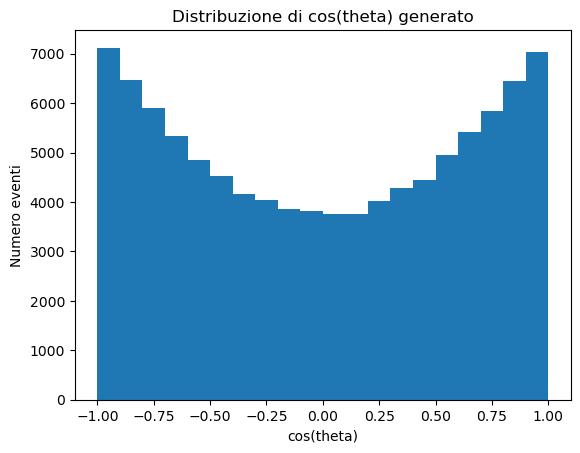

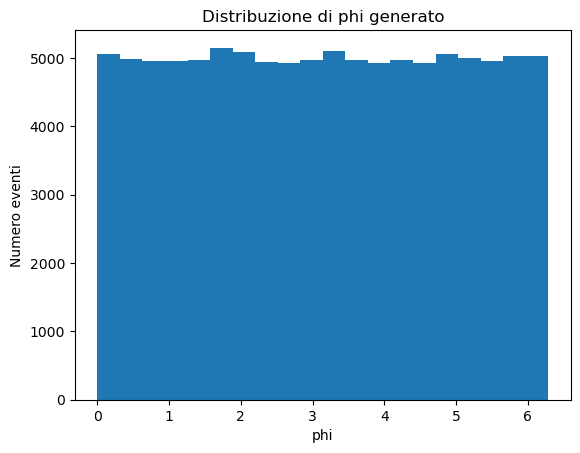

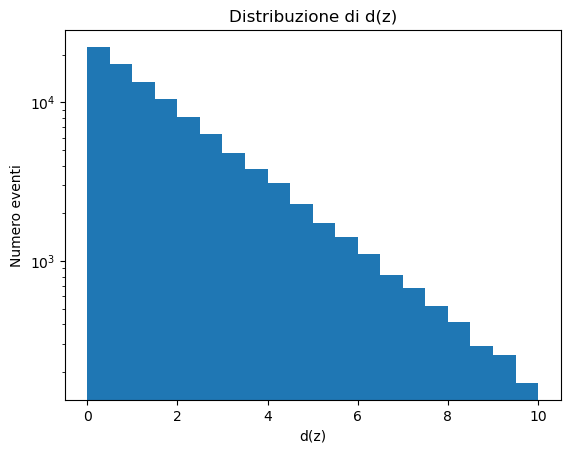

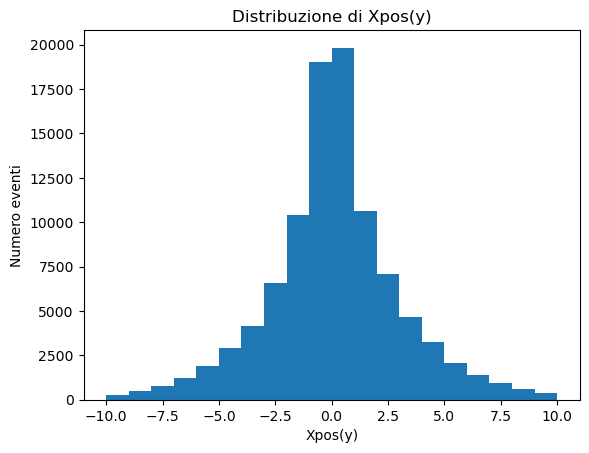

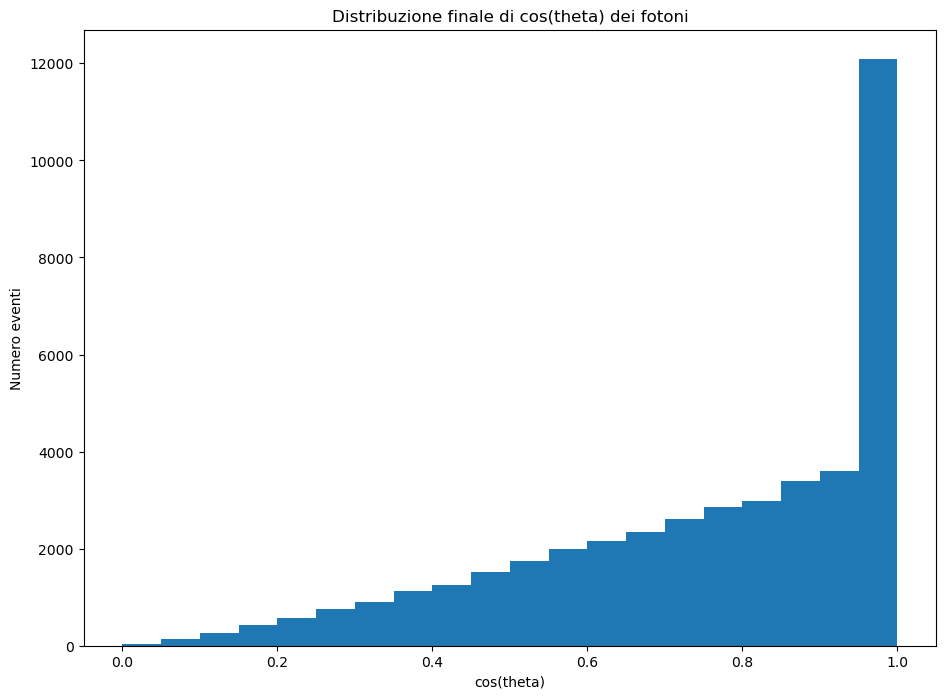

In [19]:
ngamma=100000
zmax=5
lam=2
nbin=20
do_plot=True
nout,dist=MC_gamma(ngamma,zmax,lam,nbin,do_test=do_plot)

# Output
print(f"\n{nout} fotoni degli {ngamma} fotoni iniziali attraversano completamente la lastra")
percent = nout/ngamma*100
print(f"La percentuale di fotoni che attraversa completamente la lastra è {percent}%\n")

# Plot
nb =20
xrange=(0,1)
fig, ax = plt.subplots(figsize=(11,8))
ax.set_title('Distribuzione finale di cos(theta) dei fotoni')
ax.set_xlabel('cos(theta)')
ax.set_ylabel('Numero eventi')
# Solo nout fotoni avranno attraversato completamente la lastra
nevent, bins, patches = ax.hist(dist[:nout], nb, range=xrange) 


Il notebook è ben strutturato per un corso introduttivo. Ecco alcuni suggerimenti di miglioramento:

## Suggerimenti di miglioramento

### 1. **Documentazione e commenti**
- Nella funzione `new_step`, aggiungere commenti più dettagliati sui parametri della distribuzione Thomson

### 4. **Chiarezza didattica**
- Aggiungere una cella che verifichi la normalizzazione della distribuzione Thomson
- Mostrare graficamente il confronto tra distribuzione teorica e simulata

### 5. **Gestione errori**
- Aggiungere controlli sui parametri di input (es. `lam > 0`, `ngamma > 0`)
- Gestire il caso limite quando tutti i fotoni vengono assorbiti

### 6. **Visualizzazione**
- I titoli dei grafici potrebbero essere più descrittivi
- Aggiungere unità di misura dove mancano
- Considerare l'uso di subplot per organizzare meglio i plot di controllo

## Sommario dei concetti principali

### **Fisica simulata**
- **Attenuazione esponenziale**: I fotoni attraversano un materiale con probabilità di interazione che decade esponenzialmente con la distanza (`P(z) = (1/λ)exp(-z/λ)`)
- **Scattering Thomson**: Distribuzione angolare dello scattering data da `Q(cosθ,φ) = (3/16π)(1+cos²θ)`
- **Random walk 3D**: Simulazione del percorso casuale di fotoni attraverso interazioni successive

### **Tecniche computazionali**
1. **Metodo Monte Carlo**: Simulazione stocastica di processi fisici usando numeri casuali
2. **Generazione di distribuzioni custom**: 
   - Metodo acceptance-rejection per distribuzioni non uniformi
   - Trasformazione inversa per l'esponenziale
3. **Trasformazioni geometriche**: Uso di matrici di rotazione per tracciare le traiettorie 3D

### **Strutture di programmazione**
- **Funzioni modulari**: Separazione logica tra generazione di step, rotazioni e simulazione principale
- **Accumulo di rotazioni**: Composizione di trasformazioni successive mediante prodotto matriciale
- **Condizioni di terminazione**: Il fotone esce quando `z > zmax` o `z < 0`

### **Output e analisi**
- **Distribuzione angolare finale**: Coseno dell'angolo di uscita dei fotoni
- **Frazione di trasmissione**: `nout/ngamma` rappresenta la trasparenza del materiale
- **Validazione**: I plot di controllo verificano che le distribuzioni generate siano corrette

Il notebook costituisce un eccellente esempio di come combinare fisica computazionale con concetti di programmazione fondamentali, adatto per studenti al primo anno.